## Importing

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

## Loading The Dataset

In [2]:
df = pd.read_csv(r"C:\Users\motaz\OneDrive\Desktop\Projects\Churn Prediction\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Statistical Info

In [3]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Preprocessing the dataset

### Dropping Irrelevant Features

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Handling Categorical Columns


In [10]:
data = pd.get_dummies(df,drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Handling Imbalanced Data With SMOTE


In [12]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

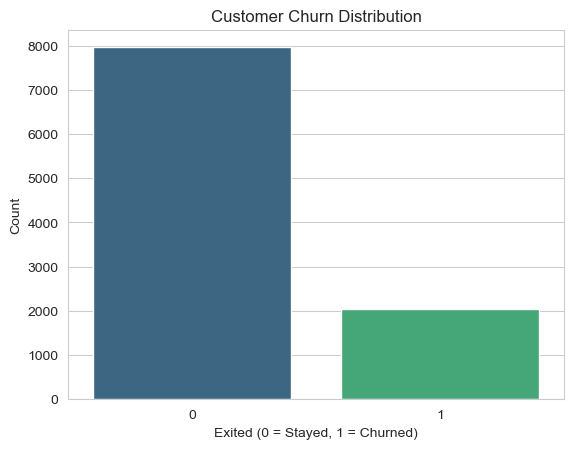

In [24]:
sns.countplot(x='Exited', data=data, palette='viridis')
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.title("Customer Churn Distribution");

In [25]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [26]:
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### Splitting The Dataset

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### Feature Scaling

In [30]:
sc= StandardScaler()

X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.26062247,  2.11159599, -1.02014721, ..., -0.75788816,
         1.57507915,  0.81369556],
       [ 1.09368927,  0.10462554, -1.38771064, ..., -0.75788816,
        -0.63488873,  0.81369556],
       [ 1.29099457,  0.50601963,  0.81766996, ...,  1.31945589,
        -0.63488873, -1.22896087],
       ...,
       [ 0.19485404,  0.20497407,  1.18523339, ..., -0.75788816,
        -0.63488873,  0.81369556],
       [-0.15591093,  1.20845929, -1.02014721, ..., -0.75788816,
         1.57507915,  0.81369556],
       [ 0.5236962 ,  1.00776225, -1.38771064, ...,  1.31945589,
        -0.63488873,  0.81369556]])

## Models

### Logistic Regression


In [32]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7740112994350282

### SVM

In [34]:
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8386691776522285

### KNeighbors Classifier

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8119899560577527

### Decision Tree Classifier

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7981795354676711

### Random Forest Classifier

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8697426239799121

### Gradient Boosting Classifier


In [42]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [43]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8370998116760828

## Showing Results

In [44]:
accuracy=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [45]:
accuracy

,Models,ACC
0,LR,0.774011
1,SVC,0.838669
2,KNN,0.811990
3,DT,0.798180
4,RF,0.869743
5,GBC,0.837100


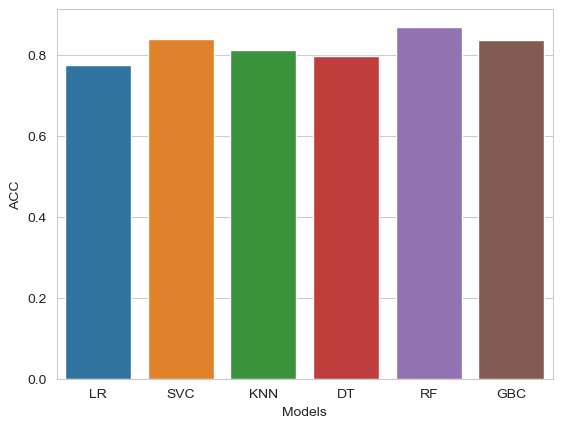

In [51]:
sns.barplot(x = accuracy['Models'], y = accuracy['ACC'], data = accuracy);

## Save Model 


In [52]:
X_res=sc.fit_transform(X_res)
rf.fit(X_res,y_res)

RandomForestClassifier()

In [53]:
with open('Churn_model.pkl', 'wb') as f:
    pickle.dump(rf,f)